In [55]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### ***Prepare Dataset of Envi Apple***

อ่านไฟล์ csv ของชุดข้อมูลตัวอย่างของ Envi

In [56]:
df_envi_inter = pd.read_csv("../DataSet/Envi/envi_inter.csv")
df_envi = pd.read_csv("../DataSet/Envi/envi.csv")
df_envi_inter.info()
# df_envi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    169 non-null    object
 1   Envi    169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [57]:
df_envi_inter

,Date,Envi
0,04/01/2015,44562
1,11/01/2015,38112
2,18/01/2015,50355
3,25/01/2015,51922
4,01/02/2015,67496
...,...,...
164,25/02/2018,42116
165,04/03/2018,44454
166,11/03/2018,28399
167,18/03/2018,49145


In [58]:
df_envi_inter["Date"] = pd.to_datetime(df_envi_inter["Date"], unit="ns")
df_envi_inter

,Date,Envi
0,2015-04-01,44562
1,2015-11-01,38112
2,2015-01-18,50355
3,2015-01-25,51922
4,2015-01-02,67496
...,...,...
164,2018-02-25,42116
165,2018-04-03,44454
166,2018-11-03,28399
167,2018-03-18,49145


ทำนายวันถ้ดไปโดยใส่ค่าปริมาณของแอปเปิ้ลวันก่อนหน้า

In [59]:
df_envi_inter["y"] = df_envi_inter["Envi"].shift(-1)
df_envi_inter.dropna(inplace=True)
df_envi_inter

,Date,Envi,y
0,2015-04-01,44562,38112.0
1,2015-11-01,38112,50355.0
2,2015-01-18,50355,51922.0
3,2015-01-25,51922,67496.0
4,2015-01-02,67496,54229.0
...,...,...,...
163,2018-02-18,39773,42116.0
164,2018-02-25,42116,44454.0
165,2018-04-03,44454,28399.0
166,2018-11-03,28399,49145.0


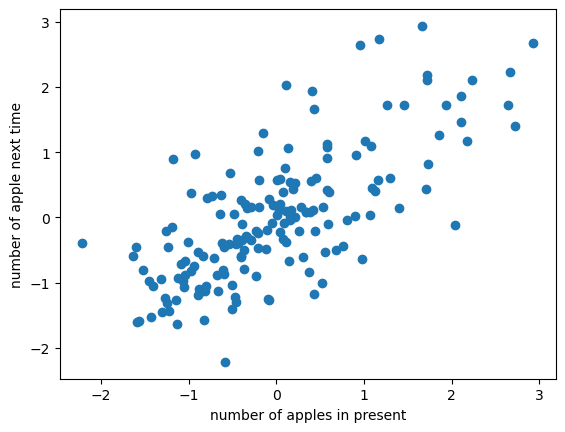

In [60]:
x = np.array(df_envi_inter["Envi"])
y = np.array(df_envi_inter["y"])

scaler = StandardScaler()
scaler.fit(x.reshape(-1, 1))
x = scaler.transform(x.reshape(-1, 1))
scaler.fit(y.reshape(-1, 1))
y = scaler.transform(y.reshape(-1, 1))
plt.scatter(x, y)
plt.xlabel("number of apples in present")
plt.ylabel("number of apple next time")
plt.show()

### ***Train Model Of Envi Apple***

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

In [62]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_result = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
print(cv_result.mean())

0.41380357256745537


### ***Predict from test_dataset Of Envi***

The Mean Square Error: 0.21825018742263302
The R2 score: 0.6292686676939492


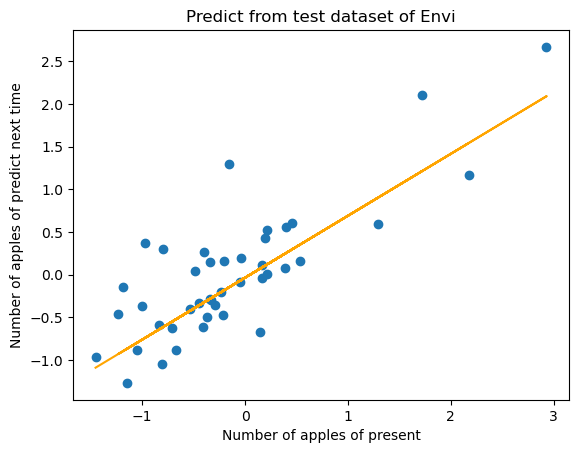

In [63]:
y_predict = model.predict(x_test.reshape(-1, 1))
print(f"The Mean Square Error: {mean_squared_error(y_test, y_predict)}")
print(f"The R2 score: {r2_score(y_test, y_predict)}")
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Envi")
plt.show()